In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from itertools import product
import json 
import csv
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
df=pd.read_csv("dftouse.csv")

In [3]:
del df['Unnamed: 0']
del df['ReserveMet']
del df['ListingStatus']
#del dftouse['MinimumToBid']
df = df[pd.isnull(df.HitCount) == False]

In [4]:
dftouse = df.copy()
dftouse.head()

,country,itemId,paymentMethod,postalCode,sellingStatus,topRatedListing,AutoPay,AvailableForPickupDropOff,BestOfferEnabled,BidCount,BuyItNowPrice,FinalPrice,GlobalShipping,HandlingTime,HitCount,ListingType,Location,MinimumToBid,ProductID,Quantity,QuantityThreshold,ShipToLocations,Title,UserID,FeedbackScore,PositiveFeedbackPercent,SellerBusinessType,NewUser,nPhotos,nPaymentMethods,nShippingCountries,conditionId,bestOfferEnabled,buyItNowAvailable,expeditedShipping,shippingType,oneDayShippingAvailable,RatingsPresent,AverageRating,NegFeedback30Day,NegFeedback365Day,PosFeedback30Day,PosFeedback365Day,auctionLength
0,0,131642735687,0,10590,0,False,False,0,False,41,NaN,202.09,False,2,190,0,"South Salem, New York",204.59,NaN,1,0,US,iPhone 5s-32gb-Space Gray-unlocked,jdwein1980,19,100.0,2,False,3,1,1,5,False,False,True,2,False,False,NaN,0,0,5,5,168
1,0,262126933108,0,35004,0,False,False,0,False,4,NaN,260.00,False,3,32,0,"Moody, Alabama",265.00,NaN,1,0,US,apple iphone 5s 32gb,forwhlrcr1965,565,100.0,1,False,2,1,1,5,False,False,True,0,False,False,NaN,0,0,3,32,120
2,0,252155964081,0,98104,0,False,False,0,False,3,NaN,152.50,False,2,168,0,"Seattle, Washington",155.00,168534287,1,0,Worldwide,Apple iPhone 5s - 32GB SPACE GRAY AT&T,15-alice,15,94.1,1,False,2,1,1,5,False,False,False,1,False,False,NaN,0,1,2,17,120
3,0,252163774777,0,98104,0,False,False,0,False,1,NaN,99.00,False,2,143,0,"Seattle, Washington",100.00,168553370,1,0,US,Apple iPhone 5s - 32GB - Silver (Verizon) Smar...,15-alice,15,94.1,1,False,7,1,1,9,False,False,True,0,False,False,NaN,0,1,2,17,120
4,0,252171170160,0,98104,0,False,True,0,False,5,NaN,96.00,False,2,357,0,"Seattle, Washington",97.00,168534287,1,0,US,Apple iPhone 5s - 32GB SPACE GRAY AT&T,15-alice,15,94.1,1,False,2,1,1,5,False,False,False,1,False,False,NaN,0,1,2,17,120


In [5]:
ZERO_IMPORTANT_VARIABLES = ['BidCount', 'HitCount', 'nPhotos', 'FeedbackScore', 'PositiveFeedbackPercent',
                           'NegFeedback30Day', 'NegFeedback365Day', 'PosFeedback30Day', 'PosFeedback365Day']
STANDARDIZABLE = ZERO_IMPORTANT_VARIABLES + ['FinalPrice','auctionLength', 'HandlingTime', 'FeedbackScore', 
                  'PositiveFeedbackPercent', 'Quantity', 'nPaymentMethods', 'nShippingCountries', 'auctionLength']
INDICATORS = []

In [6]:
for v in df.columns:
    if v != 'sellingStatus':
        l=df[v].unique()
        if len(l) <= 10:
            if v not in STANDARDIZABLE:
                dftouse.rename(columns={v:'i_'+v}, inplace=True)
                INDICATORS.append('i_'+v)
            else:
                dftouse['i_'+v]=(dftouse[v] > 0.0)*1
                INDICATORS.append('i_'+v)
            print v, l

for v in ZERO_IMPORTANT_VARIABLES:
    dftouse['i_'+v]=(dftouse[v] > 0.0)*1
    INDICATORS.append('i_'+v)
    print v
    
#INDICATORS.remove('i_sellingStatus')
print INDICATORS


country [0 1]
paymentMethod [0 1]
topRatedListing [False True]
AutoPay [False True]
AvailableForPickupDropOff [0 1]
BestOfferEnabled [False True]
GlobalShipping [False True]
HandlingTime [ 2.  3.  1.  0.]
ListingType [0 1]
QuantityThreshold [  0.  10.]
SellerBusinessType [2 1 0]
NewUser [False True]
nPaymentMethods [1 2 4 3]
conditionId [5 9 0 1 3 4]
bestOfferEnabled [False True]
buyItNowAvailable [False True]
expeditedShipping [True False]
shippingType [ 2.  0.  1.  3.  4.  8.]
oneDayShippingAvailable [False True]
RatingsPresent [False True]
BidCount
HitCount
nPhotos
FeedbackScore
PositiveFeedbackPercent
NegFeedback30Day
NegFeedback365Day
PosFeedback30Day
PosFeedback365Day
['i_country', 'i_paymentMethod', 'i_topRatedListing', 'i_AutoPay', 'i_AvailableForPickupDropOff', 'i_BestOfferEnabled', 'i_GlobalShipping', 'i_HandlingTime', 'i_ListingType', 'i_QuantityThreshold', 'i_SellerBusinessType', 'i_NewUser', 'i_nPaymentMethods', 'i_conditionId', 'i_bestOfferEnabled', 'i_buyItNowAvailable',

In [7]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(dftouse.shape[0]), train_size=0.7)

In [8]:
mask=np.ones(dftouse.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [9]:
mask

array([ True,  True, False, ...,  True,  True,  True], dtype=bool)

In [10]:
mask.shape, mask.sum()

((9267,), 6486)

In [11]:
from sklearn import preprocessing

#we make our training and testing sets w/ standarized
scaler = preprocessing.StandardScaler().fit(dftouse[mask][STANDARDIZABLE])
dftouse.loc[mask, STANDARDIZABLE] = scaler.transform(dftouse[mask][STANDARDIZABLE]) 
dftouse.loc[~mask,STANDARDIZABLE] = scaler.transform(dftouse[~mask][STANDARDIZABLE])


dftouse[mask].head()

,i_country,itemId,i_paymentMethod,postalCode,sellingStatus,i_topRatedListing,i_AutoPay,i_AvailableForPickupDropOff,i_BestOfferEnabled,BidCount,BuyItNowPrice,FinalPrice,i_GlobalShipping,HandlingTime,HitCount,i_ListingType,Location,MinimumToBid,ProductID,Quantity,i_QuantityThreshold,ShipToLocations,Title,UserID,FeedbackScore,PositiveFeedbackPercent,i_SellerBusinessType,i_NewUser,nPhotos,nPaymentMethods,nShippingCountries,i_conditionId,i_bestOfferEnabled,i_buyItNowAvailable,i_expeditedShipping,i_shippingType,i_oneDayShippingAvailable,i_RatingsPresent,AverageRating,NegFeedback30Day,NegFeedback365Day,PosFeedback30Day,PosFeedback365Day,auctionLength,i_HandlingTime,i_nPaymentMethods,i_BidCount,i_HitCount,i_nPhotos,i_FeedbackScore,i_PositiveFeedbackPercent,i_NegFeedback30Day,i_NegFeedback365Day,i_PosFeedback30Day,i_PosFeedback365Day
0,0,131642735687,0,10590,0,False,False,0,False,2.696607,NaN,-0.306904,False,0.425649,-0.037823,0,"South Salem, New York",204.59,NaN,-0.049615,0,US,iPhone 5s-32gb-Space Gray-unlocked,jdwein1980,-0.230820,0.307632,2,False,-0.817394,-0.066431,-0.825273,5,False,False,True,2,False,False,NaN,-0.152572,-0.237418,-0.266100,-0.307125,0.045701,1,1,1,1,1,1,1,0,0,1,1
1,0,262126933108,0,35004,0,False,False,0,False,-0.228452,NaN,0.019548,False,1.786971,-0.056412,0,"Moody, Alabama",265.00,NaN,-0.049615,0,US,apple iphone 5s 32gb,forwhlrcr1965,-0.210690,0.307632,1,False,-1.146831,-0.066431,-0.825273,5,False,False,True,0,False,False,NaN,-0.152572,-0.237418,-0.274446,-0.298073,-0.061208,1,1,1,1,1,1,1,0,0,1,1
4,0,252171170160,0,98104,0,False,True,0,False,-0.149396,NaN,-0.904960,False,0.425649,-0.018175,0,"Seattle, Washington",97.00,168534287,-0.049615,0,US,Apple iPhone 5s - 32GB SPACE GRAY AT&T,15-alice,-0.230967,0.083531,1,False,-1.146831,-0.066431,-0.825273,5,False,False,False,1,False,False,NaN,-0.152572,-0.201314,-0.278619,-0.303102,-0.061208,1,1,1,1,1,1,1,0,1,1,1
8,0,172006197886,0,27045,0,False,True,0,False,0.324937,NaN,-0.332779,True,0.425649,-0.004880,0,"Rural Hall, North Carolina",200.00,168553370,-0.049615,0,"[US, CA, GB, DK, RO, SK, BG, CZ, FI, HU, LV, L...",Apple iPhone 5 32GB CUSTOM BlacK/Silver Verizo...,clint22468,-0.201953,0.288641,1,False,2.147533,-0.066431,1.240940,5,False,False,False,3,False,True,4.9275,-0.152572,-0.201314,-0.115868,-0.238395,0.045701,1,1,1,1,1,1,1,0,1,1,1
9,0,272034040829,0,33487,1,False,False,0,False,0.008715,330,-0.276407,True,0.425649,-0.054412,0,"Boca Raton, Florida",210.00,168534287,-0.049615,0,"[US, CA, GB, DK, RO, SK, BG, CZ, FI, HU, LV, L...",Apple iPhone 5s - 32GB - Space Gray (AT&T) Sma...,slipknot23gsr,-0.229087,-0.326688,2,False,-0.817394,-0.066431,1.240940,5,False,True,True,2,False,False,NaN,-0.152572,-0.201314,-0.278619,-0.307125,0.045701,1,1,1,1,1,1,1,0,1,1,1


In [12]:
lcols=list(dftouse.columns)
print lcols
lcols.remove(u'sellingStatus')
print len(lcols)

['i_country', 'itemId', 'i_paymentMethod', 'postalCode', 'sellingStatus', 'i_topRatedListing', 'i_AutoPay', 'i_AvailableForPickupDropOff', 'i_BestOfferEnabled', 'BidCount', 'BuyItNowPrice', 'FinalPrice', 'i_GlobalShipping', 'HandlingTime', 'HitCount', 'i_ListingType', 'Location', 'MinimumToBid', 'ProductID', 'Quantity', 'i_QuantityThreshold', 'ShipToLocations', 'Title', 'UserID', 'FeedbackScore', 'PositiveFeedbackPercent', 'i_SellerBusinessType', 'i_NewUser', 'nPhotos', 'nPaymentMethods', 'nShippingCountries', 'i_conditionId', 'i_bestOfferEnabled', 'i_buyItNowAvailable', 'i_expeditedShipping', 'i_shippingType', 'i_oneDayShippingAvailable', 'i_RatingsPresent', 'AverageRating', 'NegFeedback30Day', 'NegFeedback365Day', 'PosFeedback30Day', 'PosFeedback365Day', 'auctionLength', 'i_HandlingTime', 'i_nPaymentMethods', 'i_BidCount', 'i_HitCount', 'i_nPhotos', 'i_FeedbackScore', 'i_PositiveFeedbackPercent', 'i_NegFeedback30Day', 'i_NegFeedback365Day', 'i_PosFeedback30Day', 'i_PosFeedback365Day'

In [13]:
#type(dftouse['i_ShipToLocations'][0])

In [14]:
ccols=[]
for c in lcols:
    if c not in INDICATORS:
        ccols.append(c)


ccols.remove('itemId')
ccols.remove('postalCode')
#ccols.remove('sellingStatus')
ccols.remove('Location')
ccols.remove('ProductID')
ccols.remove('ShipToLocations')
ccols.remove('Title')
ccols.remove('UserID')
print len(ccols), len(INDICATORS)

18 29


In [15]:
dftouse.head()

,i_country,itemId,i_paymentMethod,postalCode,sellingStatus,i_topRatedListing,i_AutoPay,i_AvailableForPickupDropOff,i_BestOfferEnabled,BidCount,BuyItNowPrice,FinalPrice,i_GlobalShipping,HandlingTime,HitCount,i_ListingType,Location,MinimumToBid,ProductID,Quantity,i_QuantityThreshold,ShipToLocations,Title,UserID,FeedbackScore,PositiveFeedbackPercent,i_SellerBusinessType,i_NewUser,nPhotos,nPaymentMethods,nShippingCountries,i_conditionId,i_bestOfferEnabled,i_buyItNowAvailable,i_expeditedShipping,i_shippingType,i_oneDayShippingAvailable,i_RatingsPresent,AverageRating,NegFeedback30Day,NegFeedback365Day,PosFeedback30Day,PosFeedback365Day,auctionLength,i_HandlingTime,i_nPaymentMethods,i_BidCount,i_HitCount,i_nPhotos,i_FeedbackScore,i_PositiveFeedbackPercent,i_NegFeedback30Day,i_NegFeedback365Day,i_PosFeedback30Day,i_PosFeedback365Day
0,0,131642735687,0,10590,0,False,False,0,False,2.696607,NaN,-0.306904,False,0.425649,-0.037823,0,"South Salem, New York",204.59,NaN,-0.049615,0,US,iPhone 5s-32gb-Space Gray-unlocked,jdwein1980,-0.230820,0.307632,2,False,-0.817394,-0.066431,-0.825273,5,False,False,True,2,False,False,NaN,-0.152572,-0.237418,-0.266100,-0.307125,0.045701,1,1,1,1,1,1,1,0,0,1,1
1,0,262126933108,0,35004,0,False,False,0,False,-0.228452,NaN,0.019548,False,1.786971,-0.056412,0,"Moody, Alabama",265.00,NaN,-0.049615,0,US,apple iphone 5s 32gb,forwhlrcr1965,-0.210690,0.307632,1,False,-1.146831,-0.066431,-0.825273,5,False,False,True,0,False,False,NaN,-0.152572,-0.237418,-0.274446,-0.298073,-0.061208,1,1,1,1,1,1,1,0,0,1,1
2,0,252155964081,0,98104,0,False,False,0,False,-0.307508,NaN,-0.586455,False,0.425649,-0.040411,0,"Seattle, Washington",155.00,168534287,-0.049615,0,Worldwide,Apple iPhone 5s - 32GB SPACE GRAY AT&T,15-alice,-0.230967,0.083531,1,False,-1.146831,-0.066431,-0.825273,5,False,False,False,1,False,False,NaN,-0.152572,-0.201314,-0.278619,-0.303102,-0.061208,1,1,1,1,1,1,1,0,1,1,1
3,0,252163774777,0,98104,0,False,False,0,False,-0.465619,NaN,-0.888048,False,0.425649,-0.043352,0,"Seattle, Washington",100.00,168553370,-0.049615,0,US,Apple iPhone 5s - 32GB - Silver (Verizon) Smar...,15-alice,-0.230967,0.083531,1,False,0.500351,-0.066431,-0.825273,9,False,False,True,0,False,False,NaN,-0.152572,-0.201314,-0.278619,-0.303102,-0.061208,1,1,1,1,1,1,1,0,1,1,1
4,0,252171170160,0,98104,0,False,True,0,False,-0.149396,NaN,-0.904960,False,0.425649,-0.018175,0,"Seattle, Washington",97.00,168534287,-0.049615,0,US,Apple iPhone 5s - 32GB SPACE GRAY AT&T,15-alice,-0.230967,0.083531,1,False,-1.146831,-0.066431,-0.825273,5,False,False,False,1,False,False,NaN,-0.152572,-0.201314,-0.278619,-0.303102,-0.061208,1,1,1,1,1,1,1,0,1,1,1


BidCount
BuyItNowPrice
FinalPrice
HandlingTime
HitCount
MinimumToBid
Quantity
FeedbackScore
PositiveFeedbackPercent
nPhotos
nPaymentMethods
nShippingCountries
AverageRating
NegFeedback30Day
NegFeedback365Day
PosFeedback30Day
PosFeedback365Day
auctionLength


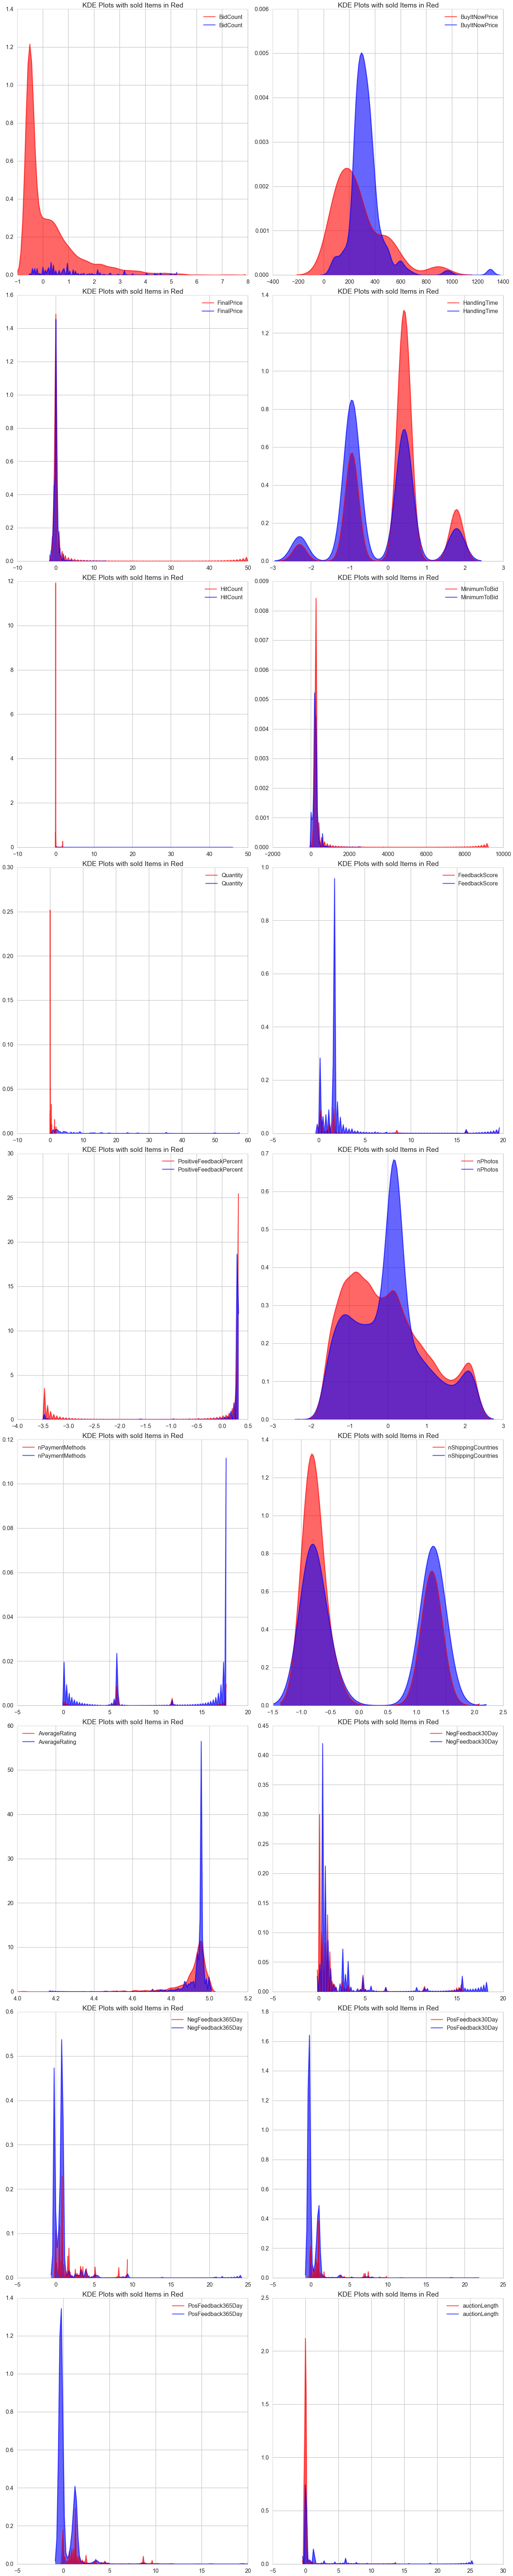

In [23]:
fig, axes = plt.subplots(nrows=9, ncols=2, sharex=False, sharey=False, figsize=(20, 100), 
                         tight_layout=True)
for ax, ccol in zip(axes.ravel(), ccols):
    
    #plot mean values per year based on response to mailing
    df_col = dftouse[ccol]
    print ccol
    sns.kdeplot(df_col[dftouse['sellingStatus'] == 0], color='r', alpha=.6, ax=ax, shade=True, legend=True)
    sns.kdeplot(df_col[dftouse['sellingStatus'] == 1], color='b', alpha=.6, ax=ax, shade=True)
    ax.set_title("KDE Plots with sold Items in Red")

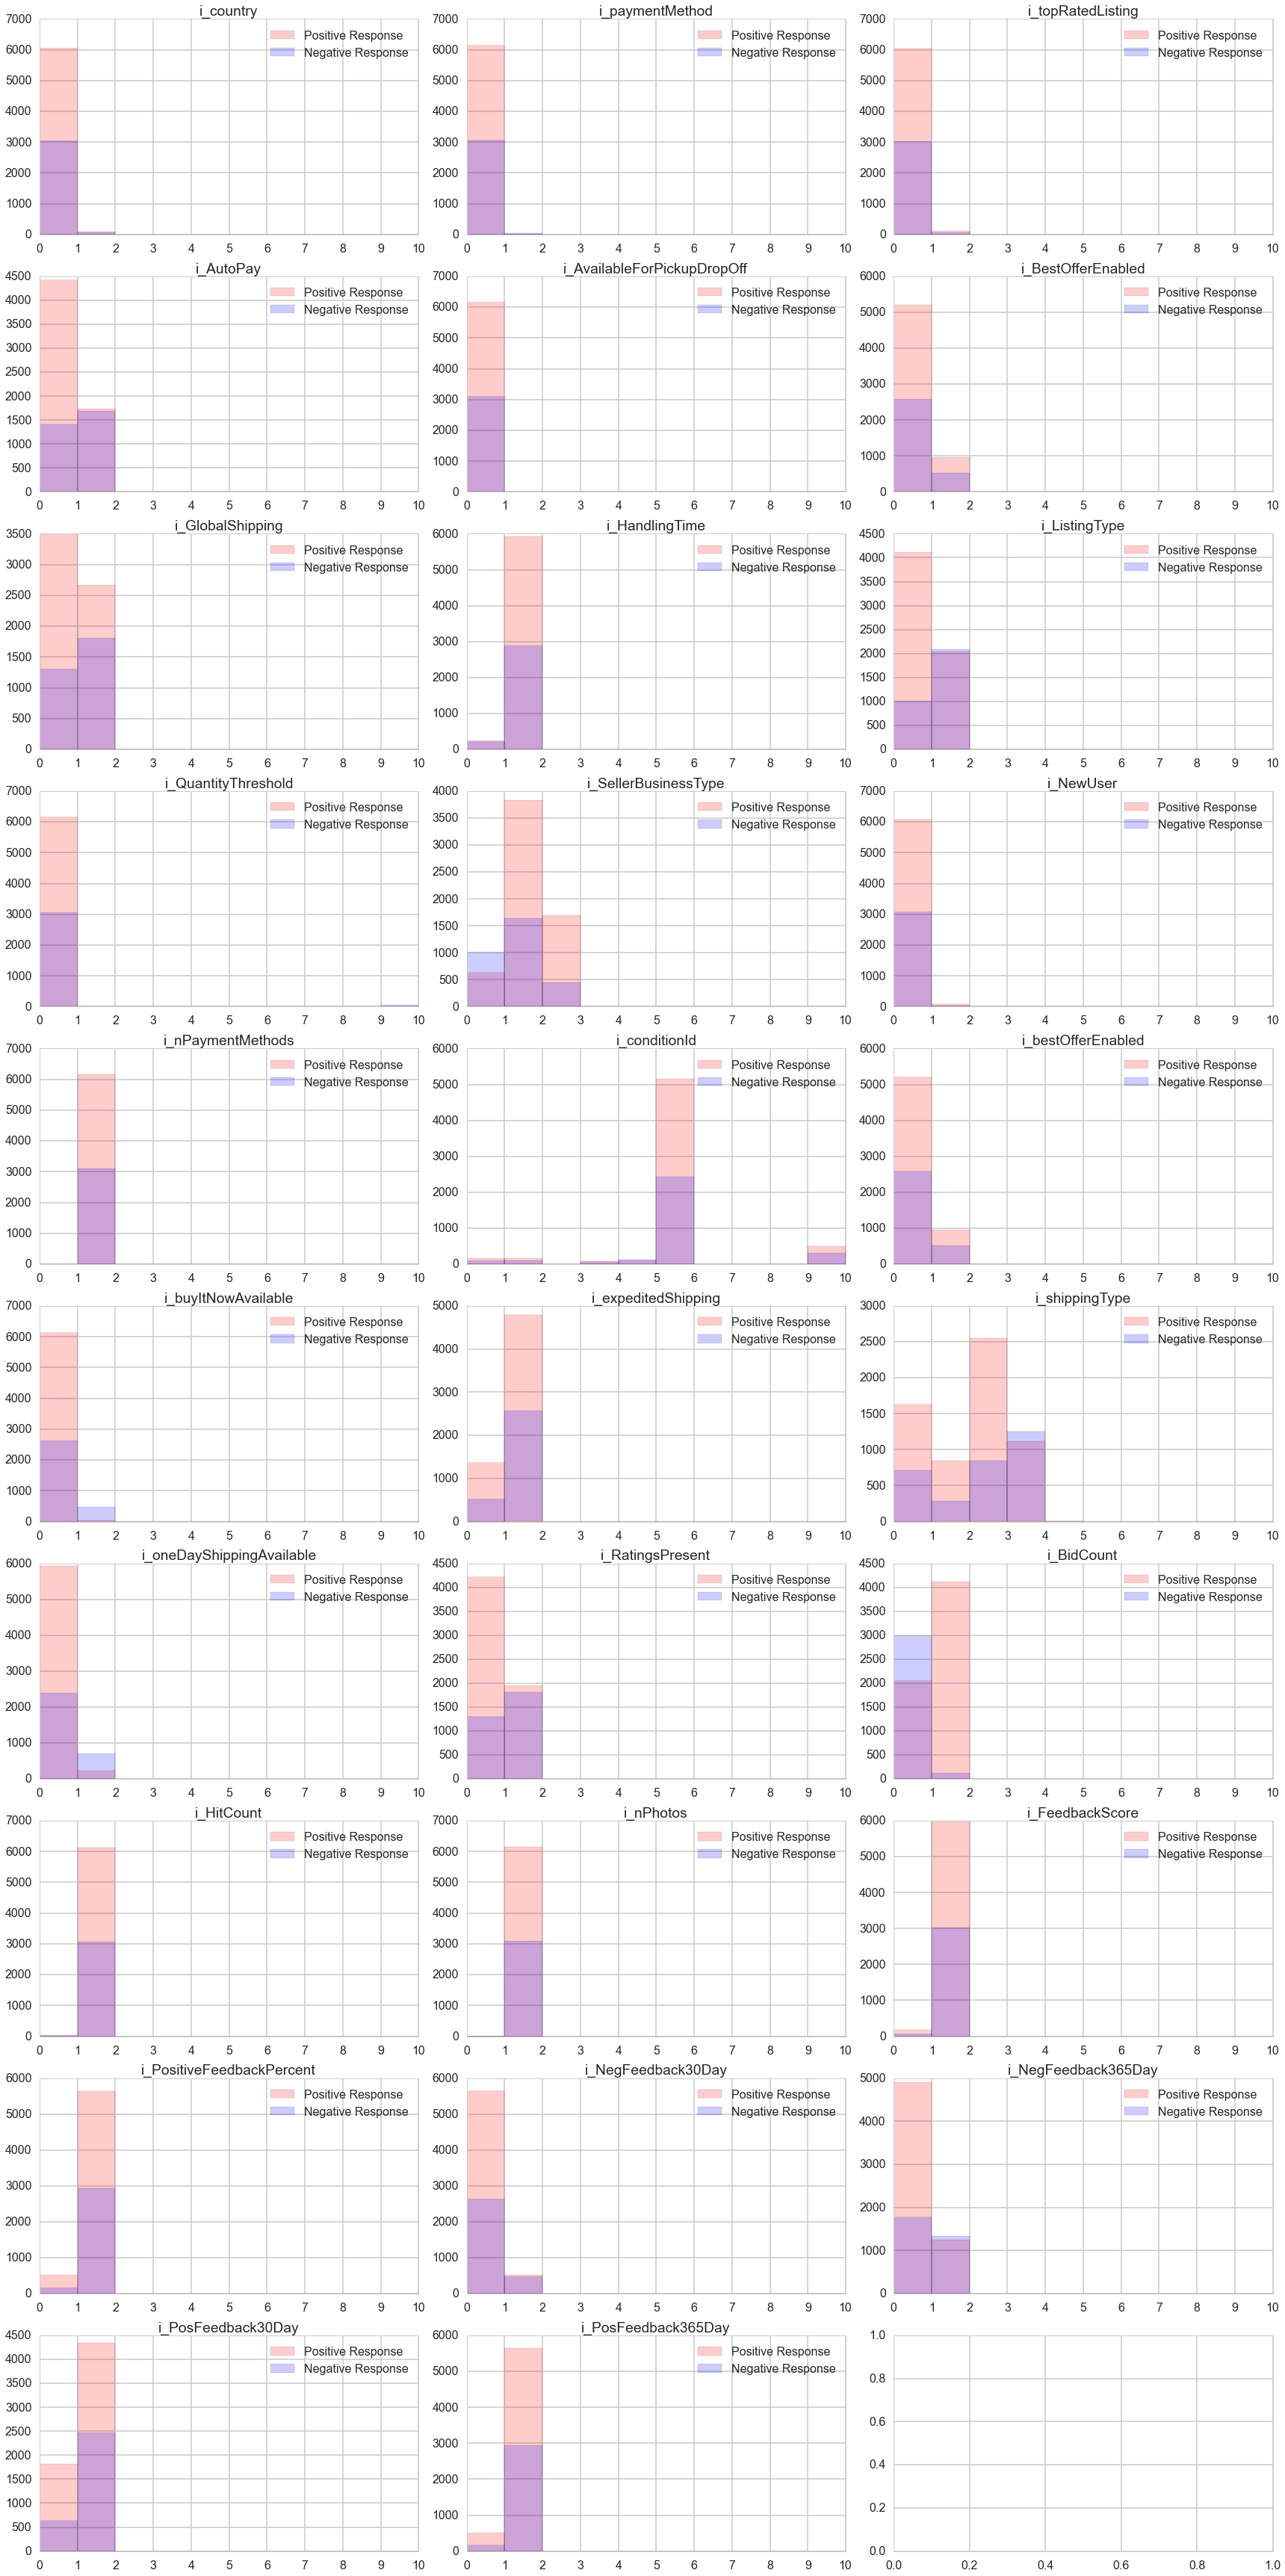

In [17]:
#setup similar layout
fig, axes = plt.subplots(nrows=10, ncols=3, figsize = (24,48),
                         tight_layout=True)

positives = dftouse[dftouse['sellingStatus'] == 0]
negatives = dftouse[dftouse['sellingStatus'] == 1]

for ax, data in zip(axes.ravel(), INDICATORS):
    ax.hist(positives[data].values, bins=10, range=[0,10], color = 'r', alpha = 0.2, label = 'Positive Response', rwidth=10)
    ax.hist(negatives[data].values, bins=10, range=[0,10], color = 'b', alpha = 0.2, label = 'Negative Response', bottom=1)
    ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
    ax.legend()
    ax.set_title(data)

In [18]:
from sklearn.svm import LinearSVC

In [24]:
lcols.remove('UserID')
lcols.remove('itemId')
lcols.remove('Title')
lcols.remove('ShipToLocations')
lcols.remove('Location')
lcols.remove('postalCode')
lcols.remove('ProductID')
lcols.remove('AverageRating')
lcols.remove('BuyItNowPrice')
lcols.remove('MinimumToBid')

In [25]:
clfsvm=LinearSVC(loss="hinge")
Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
Xmatrix=dftouse[lcols].values
Yresp=dftouse['sellingStatus'].values

In [26]:
Xmatrix_train=Xmatrix[mask]
Xmatrix_test=Xmatrix[~mask]
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

In [27]:
#Xmatrix_train
from sklearn.grid_search import GridSearchCV
gsc = GridSearchCV(clfsvm,param_grid=dict(C=Cs), cv=5, scoring = "accuracy")
gsc.fit(Xmatrix_train, Yresp_train)
best = gsc.best_estimator_
best = best.fit(Xmatrix_train, Yresp_train)

In [28]:
param_acc = best.score(Xmatrix_train, Yresp_train)

In [29]:
best

LinearSVC(C=10.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [30]:
from sklearn.grid_search import GridSearchCV
def cv_optimize(clf, parameters, X, y, n_folds=5,score_func=None):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds,scoring=score_func)
    gs.fit(X, y)
    best = gs.best_estimator_
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    return best

In [31]:
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [32]:
%%time
clfsvm, Xtrain, ytrain, Xtest, ytest = do_classify(LinearSVC(loss="hinge"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, dftouse,lcols, u'sellingStatus',1, mask=mask)

using mask
BEST {'C': 1.0} 0.805272895467 [mean: 0.71878, std: 0.04130, params: {'C': 0.001}, mean: 0.79217, std: 0.04219, params: {'C': 0.01}, mean: 0.80250, std: 0.04231, params: {'C': 0.1}, mean: 0.80527, std: 0.03988, params: {'C': 1.0}, mean: 0.76149, std: 0.09450, params: {'C': 10.0}, mean: 0.73882, std: 0.09035, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.85
Accuracy on test data:     0.85
[[1708  126]
 [ 296  651]]
########################################################
CPU times: user 10.8 s, sys: 67.9 ms, total: 10.8 s
Wall time: 11 s


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [33]:
reuse_split=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)

In [40]:

##this tells us that most of our values are closer to 0 than 1, which means most were successful sales
print "whole data set", dftouse['sellingStatus'].mean()#Highly asymmetric
print "training set", dftouse['sellingStatus'][mask].mean(), "test set", dftouse['sellingStatus'][~mask].mean()

whole data set 0.334844070357
training set 0.332408263953 test set 0.34052499101


In [34]:
ypred=clfsvm.predict(Xtest)
confusion_matrix(ytest, ypred)

array([[1708,  126],
       [ 296,  651]])

In [35]:
print "OP=", ytest.sum(), ", ON=",ytest.shape[0] - ytest.sum()

OP= 947 , ON= 1834


In [36]:
print "PP=", ypred.sum(), ", ON=",ytest.shape[0] - ypred.sum()

PP= 777 , ON= 2004


In [56]:
#tnr stands for "true negative cost"
tnc= 0.0 
listing_fee = 0

## we calcluate how many of our listings are top rated listings assuming our data is an simple random sample to get
## a probability of a listing being a top rated listing
size_df = float(len(dftouse.index))
y = float(len(dftouse[dftouse['i_topRatedListing'] == True]))
prob_toprated = y/size_df   

## we get 90% of the profit from the sale, and if you are a top rated listing, you get %20 percent off this 10% charge
profit_margin=.9 +(.02 * prob_toprated) 


## We calculate the true positive cost using the listing fee and subtracting off the profit made. We have to 
## average over new or used to make the mean better weighted for the "value" of the iPhone. We take the used value to 
## be 70% of the new value based on the fact that Apple currently sells the new one for $500 and refurbished for $340
## BestBuy: http://www.bestbuy.com/site/apple-refurbished-iphone-5s-32gb-cell-phone-unlocked-silver/1311862035.p?id=mp1311862035&skuId=1311862035
## Apple New: http://www.apple.com/shop/buy-iphone/iphone5s/32gb-space-gray

new = float(len(dftouse[dftouse['i_conditionId'] == 0]))
prob_new = new/size_df
prob_used = 1 - prob_new
tpc = listing_fee - ((df.FinalPrice.mean())*prob_new + (df.FinalPrice.mean())*(.7 * prob_used))*profit_margin


## because we have no listing fee, our fnc is just (-tpc)
fnc = - tpc

## and our false positive cost is thus also 0 because we don't have a cost to the listing
fpc = 0

In [57]:
risk_matrix=np.array([[tnc, fpc],[fnc, tpc]])
risk_matrix

array([[   0.        ,    0.        ],
       [ 163.27249097, -163.27249097]])

In [61]:
u = - risk_matrix

## to avoice writing -0
u[0][0] = 0.
u[0][1] = 0.
u

array([[   0.        ,    0.        ],
       [-163.27249097,  163.27249097]])

In [62]:
def average_profit_pp(y, ypred, u):
    c=confusion_matrix(y,ypred)
    score=np.sum(c*u)/np.sum(c)
    return score